# Importing Libraries

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test set Image Processing

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 660 files belonging to 6 classes.
['Corn___Common_Rust', 'Corn___Gray_Leaf_Spot', 'Corn___Healthy', 'Corn___Northern_Leaf_Blight', 'Corn___Northern_Leaf_Spot', 'Corn___Phaeosphaeria_Leaf_Spot']


# Loading Model

In [90]:
cnn = tf.keras.models.load_model('model.keras', )

#Visualising and Performing Prediction on Single image

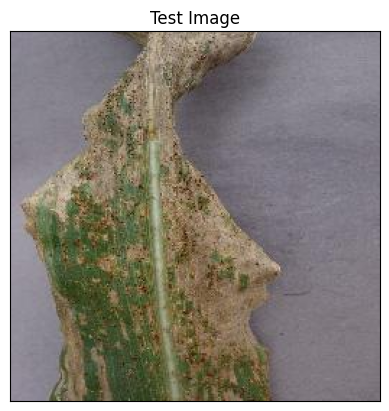

In [84]:
#Test Image Visualization
import cv2
image_path = './valid/Gray_Leaf_Spot/1ae12a5e-1f91-4aec-a508-b6e05d78a8ff___RS_NLB 3908.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [85]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [86]:
print(predictions)

[[2.4208042e-05 1.4289662e-01 3.7021688e-05 8.5647953e-01 1.8426697e-05
  5.4431357e-04]]


In [87]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


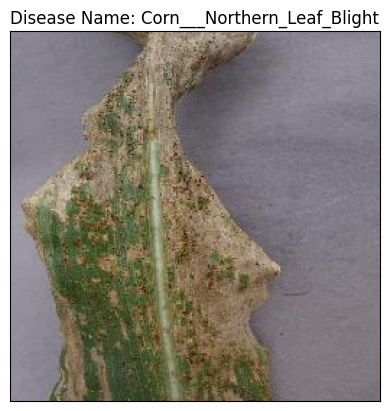

In [88]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()